In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.utils import np_utils
from keras.applications import imagenet_utils
from keras.preprocessing import image
from keras.models import Model
from keras.applications import MobileNet
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import to_categorical
import cv2

In [2]:
df = pd.read_csv('../data/preprocessed/df_mole_merged.csv')
y = df['kat.Diagnose'].values
y = y-1
y = to_categorical(y,num_classes=3,dtype='float32')
y.shape

(2900, 3)

In [3]:
from numpy import load
X = load('../data/Mole_Data/X_data.npy')


In [4]:
 x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [5]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

model = MobileNet(include_top=False, input_shape=(387, 632, 3))
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(300, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)

model = Model(inputs=model.inputs, outputs=output)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 387, 632, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 388, 633, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 193, 316, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 193, 316, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 193, 316, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 193, 316, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 193, 316, 32)     

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [7]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range= 0.1,
    horizontal_flip=True,
    vertical_flip= True)





In [8]:
#datagen.fit(x_train)

In [9]:
history = model.fit(x_train, y_train,batch_size=32,steps_per_epoch=len(x_train) / 32, epochs=3,validation_data=(x_test,y_test))

IndentationError: unexpected indent (<ipython-input-9-6bb896b198c5>, line 2)

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7793103456497192


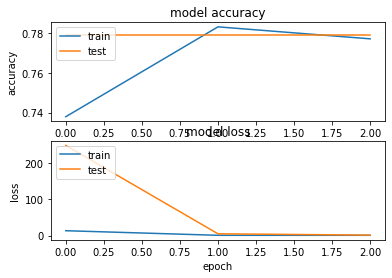

In [11]:
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train','test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train','test'], loc='upper left')  
plt.show()

In [12]:
file = ''

new_image = []
# TAKE THE IMG name(label)
new_image.append(img_to_array(load_img(file, target_size=(100,100))))

new_image = np.array(new_image).astype('float32')/255

new_pred = model.predict(new_image)
pred_idx = np.argmax(new_pred[0])
target_labels[pred_idx]

FileNotFoundError: [Errno 2] No such file or directory: ''